In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As above we have found that the missing values are present in many of the columns containing Students Grades (i.e. Object Data Type), So we are going to fill the same by each columns mode because of the catagorical data, by using the for loop as below

In [5]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode)

In [6]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [7]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now all the Missing Values have been replaced by the most frequent Grade of the respective columns (i.e. by Mode), So now no null data are there in our dataset.

In [8]:
df.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
466,CS-97467,A-,C-,A,A,B-,A,B-,B-,B+,...,A-,B,A,B-,B,B,B+,C,B-,3.149


By the above Sample, we have observed that, for the Prediction of CGPA Value, there is no need of Seat Number. So we are going to Drop this Column from the dataset.

In [9]:
df.drop(['Seat No.'],axis=1,inplace=True)

In [10]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [11]:
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

For the Data Preprossecing, Feature Engineering & making our Machine Learning Model, first we have to Encode all the Object type Grades into numeric data. So we are doing the same by using Label Encoder Method, excluding the Target Variable.

In [12]:
le=sklearn.preprocessing.LabelEncoder()

In [13]:
df.shape

(571, 42)

In [14]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [15]:
for c in df.columns[0:41]:
    df[c]=le.fit_transform(df[c].astype(str))

In [16]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,9,7,9,10,10,9,6,9,...,9,9,9,9,3,1,9,4,3,2.205
1,0,9,11,10,6,6,10,1,11,10,...,11,10,7,10,3,6,7,7,4,2.008
2,0,3,1,6,5,0,6,5,3,3,...,4,4,1,7,1,1,1,3,1,3.608
3,9,7,11,10,10,2,11,9,10,8,...,11,7,11,9,6,4,8,8,8,1.906
4,2,2,3,5,1,0,3,5,1,3,...,6,5,5,6,3,1,3,3,1,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,1,3,2,0,3,3,2,5,...,3,3,1,1,1,5,5,4,1,3.798
567,1,0,1,1,1,0,1,3,1,1,...,5,5,1,1,3,4,3,7,3,3.772
568,3,0,3,5,1,0,1,1,1,4,...,3,4,1,5,1,7,5,3,3,3.470
569,0,4,10,1,10,10,6,9,6,9,...,10,4,4,9,10,7,4,6,7,2.193


So all the features are converted into numeric values

In [17]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,3.896673,5.239930,4.886165,2.838879,5.112084,4.949212,4.875657,5.768827,...,5.036778,5.709282,4.411559,6.301226,3.537653,3.374781,4.788091,4.893170,3.633975,2.954888
std,3.046895,2.785317,2.966747,3.203104,3.000468,2.696709,2.741119,3.043407,2.670886,3.160470,...,3.404390,2.865322,3.008259,2.859944,2.848804,2.525587,2.476330,2.884466,2.717875,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,1.000000,3.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,4.000000,1.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.538000
50%,3.000000,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,4.000000,4.000000,6.000000,...,4.000000,6.000000,4.000000,6.000000,3.000000,3.000000,5.000000,5.000000,3.000000,3.029000
75%,6.000000,7.000000,5.500000,8.000000,7.000000,4.000000,6.000000,7.000000,7.000000,9.000000,...,8.000000,8.000000,6.000000,8.000000,5.000000,5.000000,6.000000,7.000000,5.000000,3.451000
max,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


By the above non graphical analysis, we have observed that 
(1) Mean & Median (50% Percentile) are lying nearby and not deviated too much from each other of almost all the feature columns. 
(2) The Standard Deviations are also around the value of 3 and below or a little above, so all the features are almost normally distributed.
(3) The difference betweem 75% Percentile and Maximum values are there of almost all the columns, so outliers possibilities are there, which can be checked by graphical analysis as below.

PH-121          AxesSubplot(0.125,0.807358;0.133621x0.0726415)
HS-101       AxesSubplot(0.285345,0.807358;0.133621x0.0726415)
CY-105        AxesSubplot(0.44569,0.807358;0.133621x0.0726415)
HS-105/12    AxesSubplot(0.606034,0.807358;0.133621x0.0726415)
MT-111       AxesSubplot(0.766379,0.807358;0.133621x0.0726415)
CS-105          AxesSubplot(0.125,0.720189;0.133621x0.0726415)
CS-106       AxesSubplot(0.285345,0.720189;0.133621x0.0726415)
EL-102        AxesSubplot(0.44569,0.720189;0.133621x0.0726415)
EE-119       AxesSubplot(0.606034,0.720189;0.133621x0.0726415)
ME-107       AxesSubplot(0.766379,0.720189;0.133621x0.0726415)
CS-107          AxesSubplot(0.125,0.633019;0.133621x0.0726415)
HS-205/20    AxesSubplot(0.285345,0.633019;0.133621x0.0726415)
MT-222        AxesSubplot(0.44569,0.633019;0.133621x0.0726415)
EE-222       AxesSubplot(0.606034,0.633019;0.133621x0.0726415)
MT-224       AxesSubplot(0.766379,0.633019;0.133621x0.0726415)
CS-210          AxesSubplot(0.125,0.545849;0.133621x0.0

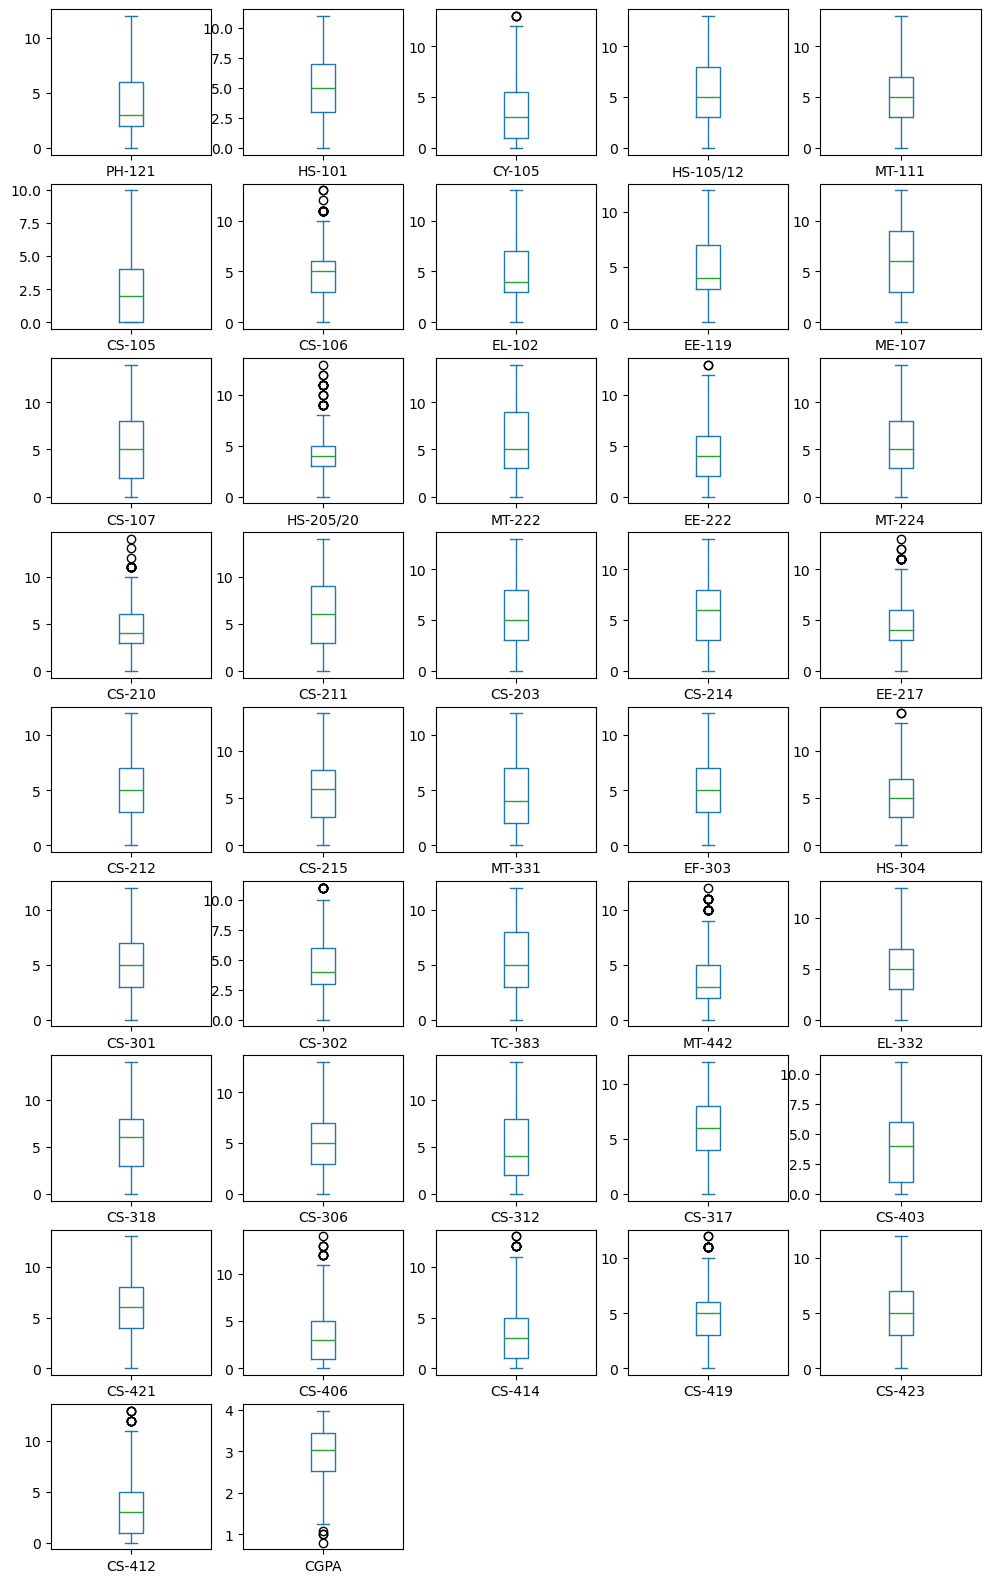

In [18]:
df.plot(kind='box',figsize=(12,20),layout=(9,5),subplots=True)

By the above Univariate Analysis via box plot, we have observed that there are some outliers in the columns of CS-106, HS-205/20, CS-210, EE-217, MT-442, CS-406, CS-414, CS-419 & CS-412 and also a little outliers are in columns CS-302, EE-222 & CY-105

So now, we are checking for the skewness present in the features as below

In [19]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.979573
HS-105/12    0.321414
MT-111       0.475278
CS-105       0.930769
CS-106       0.620337
EL-102       0.491366
EE-119       0.557823
ME-107       0.097797
CS-107       0.409851
HS-205/20    0.859356
MT-222       0.172385
EE-222       0.738631
MT-224       0.394300
CS-210       0.681732
CS-211       0.089475
CS-203       0.248765
CS-214       0.004208
EE-217       0.687902
CS-212       0.356227
CS-215       0.130428
MT-331       0.603818
EF-303       0.260400
HS-304       0.426991
CS-301       0.347396
CS-302       0.527327
TC-383       0.306460
MT-442       0.831054
EL-332       0.404870
CS-318       0.276958
CS-306       0.369094
CS-312       0.412026
CS-317       0.077195
CS-403       0.586324
CS-421       0.021621
CS-406       1.063094
CS-414       1.244110
CS-419       0.371525
CS-423       0.438071
CS-412       0.851529
CGPA        -0.497203
dtype: float64

We found that 2 features CS-406 & CS-414 are having some right sided skewness and the rest features are lying between above -1 to below 1 value which are ok

<AxesSubplot:xlabel='CS-406', ylabel='Density'>

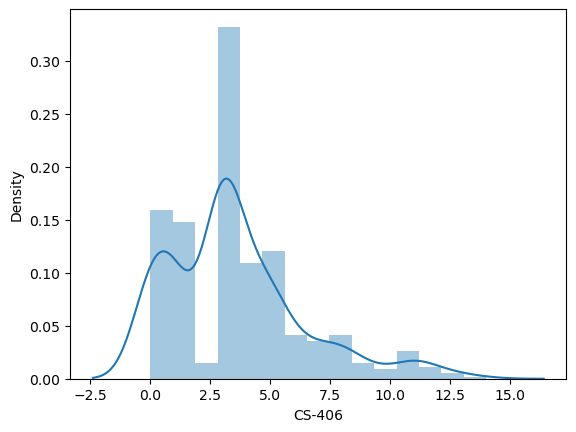

In [20]:
sns.distplot(df['CS-406'])

The same is showing in the distplot of some right sided skewness present

<AxesSubplot:xlabel='CS-414', ylabel='Density'>

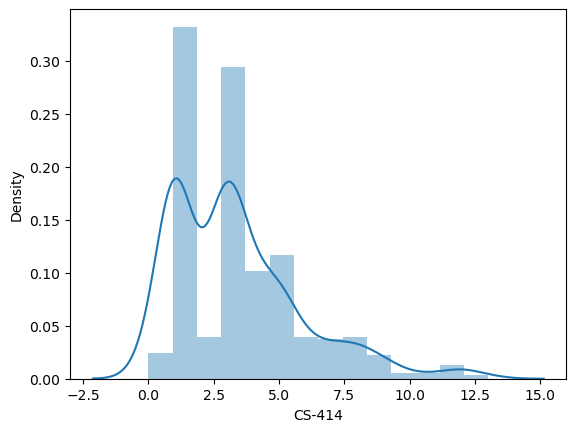

In [21]:
sns.distplot(df['CS-414'])

It is also showing the right sided skewness present as above

So we are going to overcome with the skewness by using boxcox method

In [22]:
df['CS-406']=boxcox(df['CS-406'],.5)

<AxesSubplot:xlabel='CS-406', ylabel='Density'>

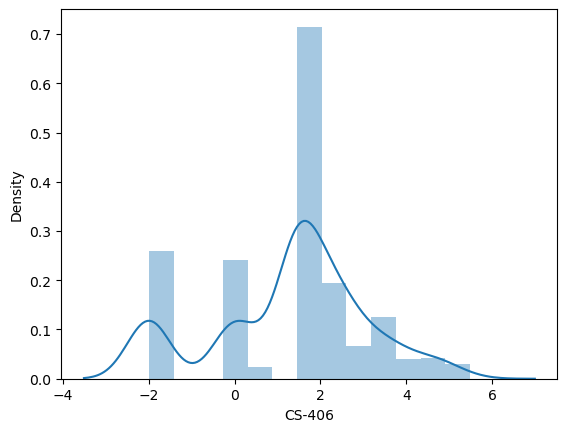

In [23]:
sns.distplot(df['CS-406'])

In [24]:
df['CS-406'].skew()

-0.38279059173519453

In [25]:
df['CS-414']=boxcox(df['CS-414'],.5)

<AxesSubplot:xlabel='CS-414', ylabel='Density'>

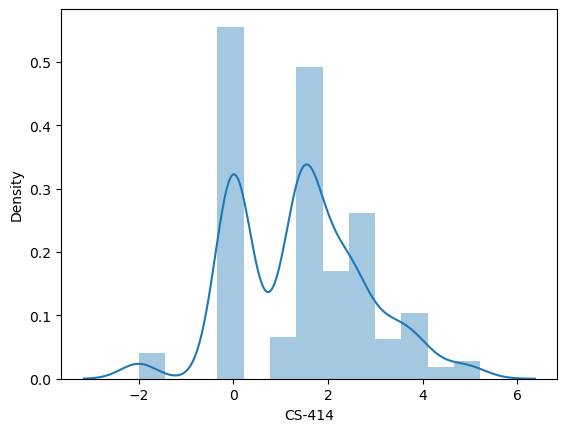

In [26]:
sns.distplot(df['CS-414'])

In [27]:
df['CS-414'].skew()

0.2147733406402189

In [28]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.979573
HS-105/12    0.321414
MT-111       0.475278
CS-105       0.930769
CS-106       0.620337
EL-102       0.491366
EE-119       0.557823
ME-107       0.097797
CS-107       0.409851
HS-205/20    0.859356
MT-222       0.172385
EE-222       0.738631
MT-224       0.394300
CS-210       0.681732
CS-211       0.089475
CS-203       0.248765
CS-214       0.004208
EE-217       0.687902
CS-212       0.356227
CS-215       0.130428
MT-331       0.603818
EF-303       0.260400
HS-304       0.426991
CS-301       0.347396
CS-302       0.527327
TC-383       0.306460
MT-442       0.831054
EL-332       0.404870
CS-318       0.276958
CS-306       0.369094
CS-312       0.412026
CS-317       0.077195
CS-403       0.586324
CS-421       0.021621
CS-406      -0.382791
CS-414       0.214773
CS-419       0.371525
CS-423       0.438071
CS-412       0.851529
CGPA        -0.497203
dtype: float64

Now all the feature columns are having skewness under the normal range from above -1 to below 1, which are ok. Rest of the outliers would be handle by absolute zscore method.

Now we are going to check the corelation between different features

In [29]:
dfcor=df.corr()

In [30]:
dfcor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.556452,0.497219,0.459944,0.609990,0.284001,0.415215,0.571606,0.525444,...,0.020735,0.386364,0.308438,0.231461,-0.014124,0.084590,0.408423,0.056621,0.089879,-0.663135
HS-101,0.382436,1.000000,0.334650,0.472566,0.426705,0.400713,0.306397,0.343781,0.302590,0.331525,...,0.203610,0.323125,0.223016,0.265971,0.201286,0.179653,0.256312,0.203382,0.143687,-0.537170
CY-105,0.556452,0.334650,1.000000,0.510866,0.534947,0.577049,0.373782,0.444571,0.454472,0.457173,...,0.239912,0.379092,0.449231,0.277645,-0.010345,-0.051343,0.367156,0.074152,-0.070842,-0.656443
HS-105/12,0.497219,0.472566,0.510866,1.000000,0.493522,0.480967,0.495668,0.359747,0.391483,0.316392,...,0.248722,0.413813,0.441815,0.365546,0.049266,0.103244,0.422018,0.203107,0.063912,-0.612201
MT-111,0.459944,0.426705,0.534947,0.493522,1.000000,0.384105,0.493017,0.559400,0.407169,0.470094,...,0.454518,0.501198,0.403067,0.463393,0.268130,0.193945,0.463315,0.368737,0.215823,-0.716971
CS-105,0.609990,0.400713,0.577049,0.480967,0.384105,1.000000,0.276808,0.344655,0.498007,0.449509,...,0.044216,0.319060,0.267700,0.182825,-0.023286,0.062225,0.260482,0.011767,0.012286,-0.613169
CS-106,0.284001,0.306397,0.373782,0.495668,0.493017,0.276808,1.000000,0.333797,0.254957,0.266259,...,0.437786,0.367131,0.418845,0.356434,0.138675,0.078545,0.386281,0.312825,0.171300,-0.521990
EL-102,0.415215,0.343781,0.444571,0.359747,0.559400,0.344655,0.333797,1.000000,0.445340,0.453671,...,0.287867,0.402481,0.296622,0.321639,0.218195,0.202232,0.338437,0.331328,0.197545,-0.629657
EE-119,0.571606,0.302590,0.454472,0.391483,0.407169,0.498007,0.254957,0.445340,1.000000,0.570836,...,0.144826,0.405155,0.330413,0.326456,0.092301,0.181948,0.433412,0.222351,0.187788,-0.633992
ME-107,0.525444,0.331525,0.457173,0.316392,0.470094,0.449509,0.266259,0.453671,0.570836,1.000000,...,0.191240,0.405601,0.330178,0.304296,0.152240,0.117683,0.400811,0.192234,0.163737,-0.654215


Now we are putting the above corelation values in heatmap for graphical analysis

<AxesSubplot:>

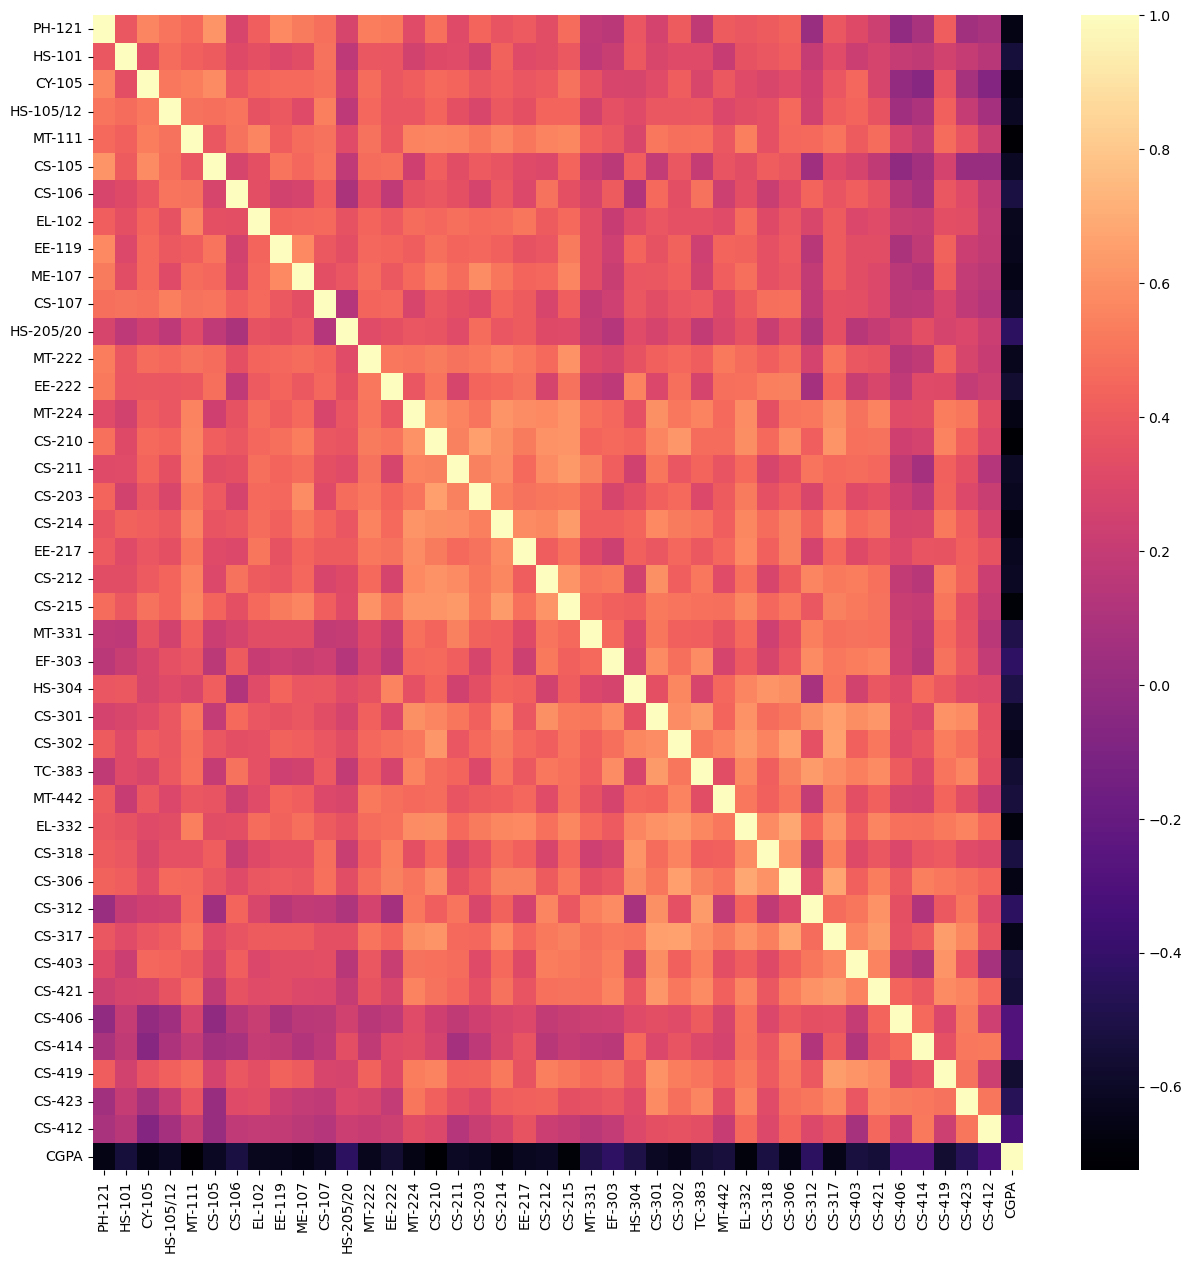

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(dfcor,cmap='magma')

Because of the 41 columns in our dataset, except the target column, it is difficult the understand the corelations via above heatmap, event after removing the annot value presentation. So by Bivariate Analysis of each feature with comparison to the target column, we are ploting the scatter plot by using the For Loop as below.

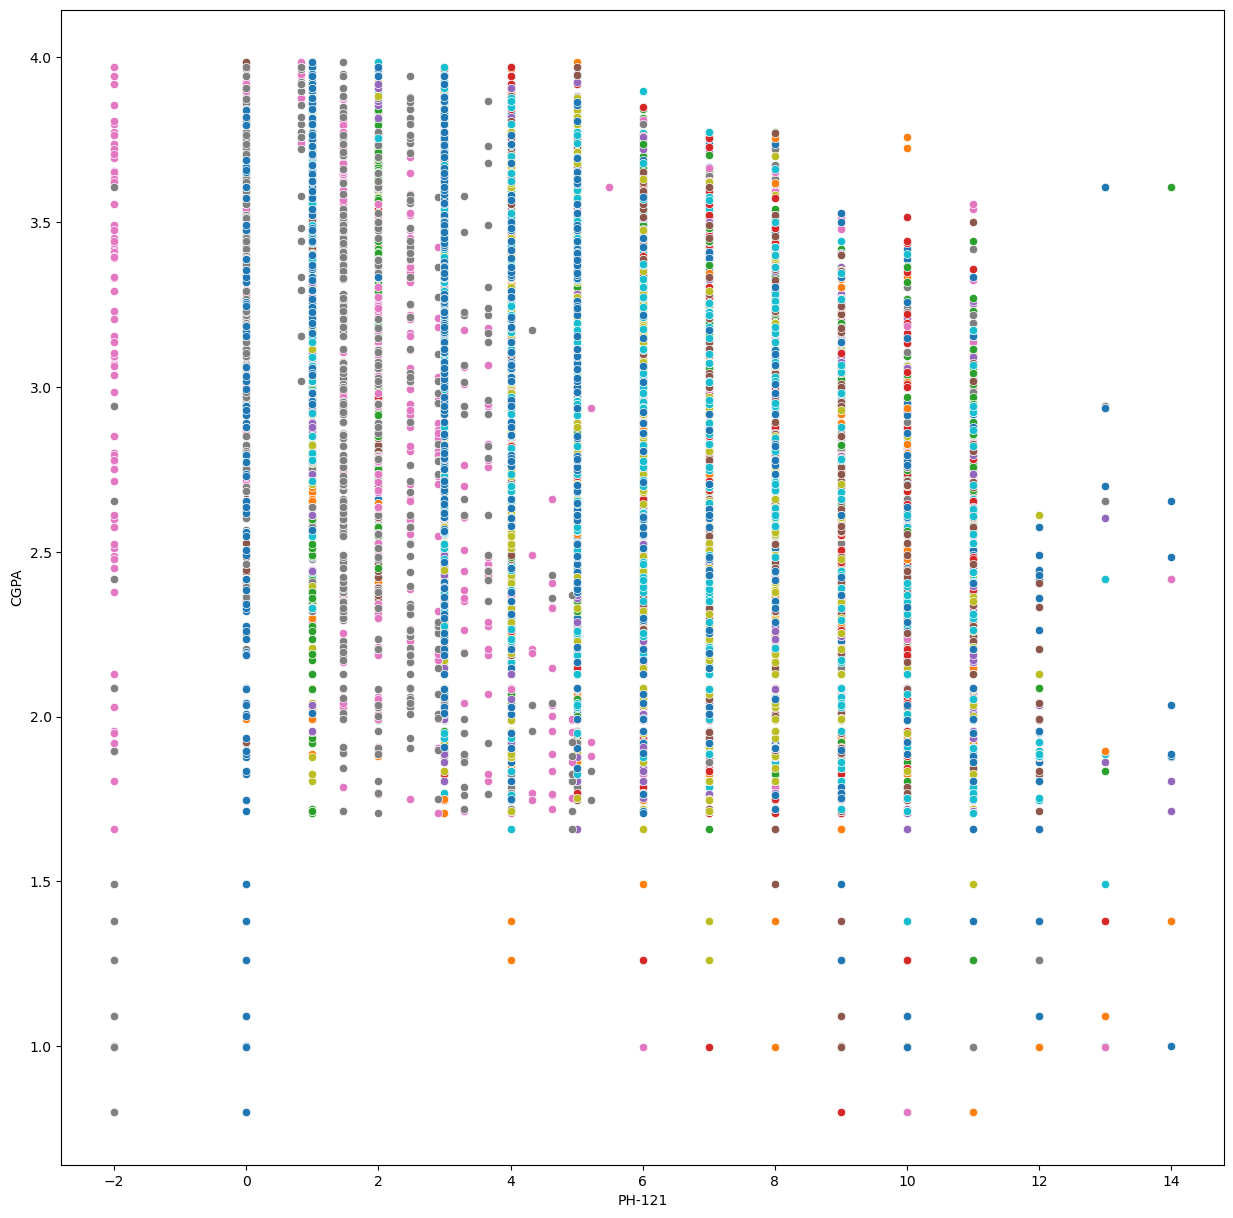

In [32]:
plt.figure(figsize=(15,15))
for s in df.columns[0:41]:
    sns.scatterplot(df[s],df['CGPA'])

By comparison of eath feature with the target variable, we have found that each variable is contributing in a parallel way for making CGPA Value. So there are no Noise data and no need to drop any feature column.

As per my observation, keeping all the above features would be a better idea to make our best Machine Learning Mode.

In [33]:
z=np.abs(zscore(df))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.400402,1.770900,1.721685,0.549971,1.372267,2.657832,1.784746,1.332171,0.421332,1.023268,...,1.165171,1.149470,1.526619,0.944473,0.087925,1.027418,1.702359,0.309920,0.233466,1.209480
1,1.242052,1.411559,2.396415,1.487383,0.371546,1.173242,1.784746,1.298766,2.295011,1.339954,...,1.753163,1.498777,0.861199,1.294437,0.087925,1.086924,0.894004,0.731046,0.134791,1.527217
2,1.242052,0.744483,0.977236,0.237500,0.037972,1.053643,0.324209,0.016703,0.702876,0.876849,...,0.304808,0.597064,1.135059,0.244546,0.728164,1.027418,1.531061,0.656908,0.969980,1.053392
3,1.714365,0.692879,2.396415,1.487383,1.705840,0.311348,2.149881,1.332171,1.920275,0.706582,...,1.753163,0.450857,2.192038,0.944473,0.887725,0.431262,1.298181,1.078034,1.607820,1.691731
4,0.585070,1.103823,0.302506,0.074971,1.296322,1.053643,0.771195,0.016703,1.452347,0.876849,...,0.283183,0.247757,0.195780,0.105418,0.087925,1.027418,0.722706,0.656908,0.969980,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.256579,1.822504,0.977236,0.699913,0.962748,1.053643,0.771195,0.641032,1.077612,0.243477,...,0.598804,0.946371,1.135059,1.855237,0.728164,0.775610,0.085649,0.309920,0.969980,1.359839
567,0.913561,1.822504,0.977236,1.324855,1.296322,1.053643,1.501464,0.641032,1.452347,1.510221,...,0.010812,0.247757,1.135059,1.855237,0.087925,0.431262,0.722706,0.731046,0.233466,1.317904
568,0.256579,1.822504,0.302506,0.074971,1.296322,1.053643,1.501464,1.298766,1.452347,0.560163,...,0.598804,0.597064,1.135059,0.455382,0.728164,1.373207,0.085649,0.656908,0.233466,0.830814
569,1.242052,0.385142,2.059050,1.324855,1.705840,2.657832,0.324209,1.332171,0.421332,1.023268,...,1.459167,0.597064,0.136930,0.944473,1.682340,1.373207,0.318529,0.384057,1.239563,1.228834


In [34]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,9,7,9,10,10,9,6,9,...,9,9,9,9,1.464102,0.000000,9,4,3,2.205
1,0,9,11,10,6,6,10,1,11,10,...,11,10,7,10,1.464102,2.898979,7,7,4,2.008
2,0,3,1,6,5,0,6,5,3,3,...,4,4,1,7,0.000000,0.000000,1,3,1,3.608
3,9,7,11,10,10,2,11,9,10,8,...,11,7,11,9,2.898979,2.000000,8,8,8,1.906
4,2,2,3,5,1,0,3,5,1,3,...,6,5,5,6,1.464102,0.000000,3,3,1,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,1,3,2,0,3,3,2,5,...,3,3,1,1,0.000000,2.472136,5,4,1,3.798
567,1,0,1,1,1,0,1,3,1,1,...,5,5,1,1,1.464102,2.000000,3,7,3,3.772
568,3,0,3,5,1,0,1,1,1,4,...,3,4,1,5,0.000000,3.291503,5,3,3,3.470
569,0,4,10,1,10,10,6,9,6,9,...,10,4,4,9,4.324555,3.291503,4,6,7,2.193


After removing the above 3 value of standard deviation of both sides of the data with absolute positive method, we have lost only 3% approximate data of outliers (i.e. 571 rows - 553 rows = 18 rows lost, which is only 3% of the whole dataset)

So we spliting our cleanded data into Independent & Dependent (Target) Variables

In [35]:
x=cleaned_df.iloc[:,0:-1]

In [36]:
y=cleaned_df.iloc[:,-1]

In [37]:
x.shape

(553, 41)

In [38]:
y.shape

(553,)

Now we are trying to train our model with differenct linear regression algorithms with different random states using for loop.

In [39]:
lr=LinearRegression()

In [40]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.9713153970998794
0.9562038220891613
0.9630874520824554
0.9682788242169065
0.9537514581320328
0.9451243914334865
0.8660728875637738
0.9604474915175999
0.8569104605835217
0.9315851868282359
0.9345156177992153
0.8579061464680462
0.8243755691731941
0.8587339457444907
0.8500996777683746
0.8692724595192292
0.9572019387130642
0.9674091907665068
0.8529920894381959
0.9564741240481295
0.9710787211340681
0.964068560212551
0.9580371719822264
0.9602014078895592
0.8821236056817918
0.9678811035825525
0.942312291871701
0.9673334618176791
0.9691273556261413
0.96941028259263
0.9575813163658591
0.8284405269004866
0.8463280962177604
0.8615510448126348
0.9671450271021969
0.9562967350418065
0.9518001078073541
0.9618100212661769
0.9618563839167426
0.8674443959203755
0.8367688363041295
0.94827825285271
0.9612275738047367
0.9576185304130505
0.8710201162257305
0.9491937106847053
0.9741924984944369
0.9473388930153865
0.9588662602885459
0.9595503303544817


In [41]:
sv=SVR()

In [42]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sv.fit(xtrain,ytrain)
    pred=sv.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.959725652122228
0.9420927274701695
0.9717728367621611
0.969873692391388
0.9747011869023958
0.9650220450984122
0.9205212625290174
0.9707158659933365
0.936286496572245
0.9642281274194482
0.9644925294305968
0.9474134913989996
0.9130468040126697
0.9315698188409597
0.9350094851038846
0.9426573125858926
0.9716537219744148
0.969521194715613
0.9317653042908398
0.9657319929854465
0.970703937952398
0.9715682530597255
0.9708655768893921
0.976234023629366
0.9369276638649965
0.9753062831803806
0.9697290215549997
0.9690827764022503
0.9697112075769413
0.9610335932444249
0.9675582634021536
0.937775629287704
0.9029819121745732
0.9182419352687653
0.9760920013322926
0.9686175626997413
0.9535367770691323
0.9662894474840732
0.9568178103808129
0.9108960220946895
0.9338531566125389
0.9676733355538555
0.9700639307696456
0.9764796949323651
0.9229299116230741
0.9675907300095821
0.9749956835972063
0.9524685081967147
0.9546924620470031
0.9561207336051222


In [43]:
dt=DecisionTreeRegressor()

In [44]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred=dt.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.78452977869593
0.7718634262851487
0.7905408718820152
0.8661735021471187
0.8147866386572941
0.7588286716983229
0.729439980818194
0.7905980093708873
0.6966371491312493
0.7660570977663745
0.739032653539791
0.7352516900451029
0.6657999423521466
0.7103788510109286
0.7021887016617729
0.7315556514982625
0.736489737935201
0.8058426775663071
0.6570029345580934
0.8612386094942184
0.7856565968430298
0.8463108868016729
0.8364956108543766
0.8077737453087335
0.7473878904030414
0.8436091391602882
0.7826970481304858
0.8193884884019117
0.8468640675327039
0.8226077494237419
0.7611987585593127
0.6770503304195856
0.7970774074394305
0.7525803982613434
0.8328156587861842
0.7494049749015215
0.8013491710252367
0.8202295286300323
0.8433896916507185
0.7543827439356774
0.7230530408915152
0.7765151374056037
0.7296155677274296
0.7517186347517151
0.7397521447119859
0.8483373292149163
0.8611993391202879
0.7380336500332696
0.8142928179994089
0.7038164656691694


In [45]:
br=BayesianRidge()

In [46]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    br.fit(xtrain,ytrain)
    pred=br.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.9741004913540913
0.9596469404140349
0.9668825193678902
0.9717338489543238
0.9575913231337654
0.9482023784677925
0.8664859840782141
0.9652104823917156
0.8576141454964725
0.9376966153668395
0.9402499146649654
0.8583369971371997
0.8257646601455426
0.8593227429368543
0.8509149027845744
0.8703556985258322
0.9627402939637701
0.9719123590015466
0.8533901180567356
0.9632483518498007
0.9753809801009653
0.967343474097324
0.9611036656175663
0.9632077522232676
0.8827971944965701
0.9717884920530238
0.9469717655887162
0.9698212850177771
0.974013008049688
0.9726590486694224
0.9650240504837552
0.8295549317531168
0.8481765838694686
0.8622978636634306
0.9709702962390055
0.959030470035165
0.9542462807904675
0.9665279271964577
0.9672282975659193
0.8675026723557815
0.837306008958635
0.9520733453667873
0.9667651912384706
0.9606503425019777
0.8716949893882051
0.9523718302534825
0.9772662482021062
0.9510310505301117
0.961744455212634
0.9627024667858678


In [47]:
gb=GradientBoostingRegressor()

In [48]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gb.fit(xtrain,ytrain)
    pred=gb.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.9569475437758431
0.9422161895453846
0.9718231283054406
0.9722529628906094
0.9682361956257635
0.9609171630916313
0.8889311221118836
0.9641947730741149
0.8910815871996274
0.9472052935432463
0.9541563940191712
0.8769387099533451
0.8547235334758235
0.8819951334282089
0.8941048779284774
0.8851292623808612
0.9608423197911125
0.9631533410260901
0.8900328019302646
0.956964078953575
0.9688730512111908
0.9635827440527109
0.9644542484345306
0.9666951651899944
0.8984448519572916
0.9711264696029172
0.962549022145834
0.9583003081663409
0.9676189315594633
0.9556429731474682
0.9659881573821035
0.8457947212726452
0.8695937567616635
0.8997358379750771
0.9674285653340122
0.9671942717434748
0.9583618217854563
0.9686024024440235
0.9506705546268475
0.8802797116692076
0.8597258801657054
0.9474525971095069
0.9601355045935246
0.9586095690609028
0.8975907818090542
0.9669631890224263
0.9676341095974487
0.9578067693660649
0.9586311699788639
0.9576597352250755


In [49]:
kn=KNeighborsRegressor()

In [50]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred=kn.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.9490805184311096
0.9308070245532726
0.945084096843541
0.9569541103583536
0.9445244724518401
0.9380386548744442
0.8583042432089051
0.9521653229520312
0.847114185322007
0.9283097817591468
0.9298894625619348
0.8694765306999058
0.8382209647522241
0.8556526361706417
0.8648392933169307
0.8693316762688411
0.9541313721299701
0.9596115501070217
0.8549415700606562
0.9571812287386059
0.9667260254532152
0.9590896086125384
0.9492703192388168
0.9433867616570827
0.879972470751325
0.9633195638011188
0.9281942099456059
0.951155419696437
0.9584497829788746
0.9548184845826893
0.9591342723234897
0.839250311669188
0.8537690201444186
0.8631873157414395
0.9666921928552021
0.9428718710169466
0.9391178441766611
0.9493504465362836
0.9480361795044181
0.8643101805565329
0.8407043097099307
0.9344450743729372
0.9485936101866748
0.9534370047890234
0.8584624991382804
0.9474850456585655
0.9641016251619545
0.9317735534806304
0.9385954620224034
0.9407810383286052


In [51]:
ad=AdaBoostRegressor()

In [52]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    ad.fit(xtrain,ytrain)
    pred=ad.predict(xtest)
    rscore=r2_score(ytest,pred)
    print(rscore)

0.8989214256046523
0.8959217678167857
0.9109552190060762
0.9217547806884868
0.9143051258063937
0.9095576323435438
0.8344029730250864
0.9175511906894877
0.8506167201814372
0.8881403145545018
0.9124192634064151
0.8460555391970552
0.815167941374452
0.8440348141559193
0.8173468295122484
0.8485166729969775
0.9047472866186452
0.9176884595234848
0.8411440738312901
0.9033437427073294
0.9029869037216044
0.9110781173180237
0.8972777976571104
0.9044440303421984
0.8615989778494768
0.9153875888876277
0.908683294910702
0.8963922524040291
0.9193045766372266
0.9082796433616033
0.912341605075212
0.8296761641194861
0.8301087826395432
0.8355289299032672
0.9104799219187785
0.9015138260680777
0.8934188448860382
0.8963128565663604
0.8985893129098743
0.8384609050681976
0.8245798576364258
0.9031511177507042
0.9202671970889782
0.9029781651793225
0.8458355310110939
0.9026706846813194
0.9330146998344842
0.9176993949254999
0.9185684410957103
0.9140691755764669


As by the above we have observed that the Linear Regression Algorithm is giving the best above 97% accurate prediction with 0 random state. So we are goint to use this Algo with 70% of traing & 30% of testing dataset.

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [54]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [55]:
lrpred=lr.predict(xtest)

In [56]:
r2_score(ytest,lrpred)

0.9713153970998794

By comparing our machine prediction with the actual target data it is above 97% accurate.

In [57]:
mean_squared_error(ytest,lrpred)

0.010845786091762675

The Mean Squared Error is also very low.

In [58]:
mean_absolute_error(ytest,lrpred)

0.07659181405688757

The Mean absolute Error is also very low.

Now we are checking our best model by cross validation method with different data splits

In [59]:
cv=cross_val_score(lr,x,y,cv=KFold(n_splits=10))

In [60]:
cv

array([0.59510194, 0.97727576, 0.93100747, 0.98136219, 0.94799486,
       0.94917713, 0.94880656, 0.98082851, 0.9581435 , 0.95945708])

In [61]:
cv.mean()

0.9229155003802874

With 10 splits, our cross validation is giving above 92% accurate results. So we are going to save this model via pickle method.

In [62]:
pickle.dump(lr, open('student_grade', 'wb'))

In [63]:
model=pickle.load(open('student_grade', 'rb'))

In [64]:
model_test=model.predict(xtest)

In [65]:
model_test

array([1.67552513, 2.67672044, 3.97467915, 2.22982141, 3.90613721,
       3.3231229 , 2.1568953 , 1.90444589, 3.83611978, 3.6533109 ,
       2.5518473 , 3.97752756, 3.16147412, 3.94856239, 2.63405366,
       2.97769542, 1.85875383, 3.4737701 , 3.13765704, 2.86923388,
       2.84959189, 3.90731533, 2.47864914, 3.76513338, 2.58032815,
       3.34637761, 2.86686096, 3.07781553, 3.24276619, 2.83736011,
       3.08736247, 2.83719243, 3.13247942, 3.24671819, 1.93435569,
       3.28122397, 2.83822433, 2.45911324, 2.73587716, 3.28964522,
       3.24091663, 2.87133147, 1.77731365, 3.18878219, 3.93236922,
       3.62308612, 3.309981  , 2.20483518, 3.50148269, 3.8861977 ,
       2.77200753, 3.2131432 , 2.07698959, 2.14487687, 2.87193573,
       3.02395043, 2.63598562, 2.516047  , 2.28946505, 2.43476081,
       3.67320635, 3.23269333, 3.57132153, 1.98328314, 3.74111563,
       2.08331657, 3.25957396, 2.52648746, 2.74909713, 3.75538327,
       3.40768937, 2.39609839, 3.31398589, 3.42594303, 3.30403

In [66]:
r2_score(ytest,model_test)

0.9713153970998794

In [67]:
mean_squared_error(ytest,model_test)

0.010845786091762675

In [68]:
mean_absolute_error(ytest,model_test)

0.07659181405688757

As by using our save ML Model, we are getting above 97% accurate predictions with very low Errors, we are going to use the Hyper Parameter Tuning also with our best model.

In [115]:
gs=GridSearchCV(estimator=lr,param_grid={"fit_intercept":[True],"normalize":[True],"copy_X":[True]},cv=3,n_jobs=-1)

In [116]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'normalize': [True]})

In [117]:
lr.score(xtest,ytest)

0.9713153970998794

By using the Hyper Parameter Tuning, we are getting the same prediction accuracy of above 97% with our saved Linear Regresstion Model (i.e. lr Model)